In [3]:
# import numpy as np
# import struct
# import gzip
# import matplotlib.pyplot as plt
# import mindspore
# from mindspore import Tensor
# from mindspore.dataset import vision

# def read_images(file_path):
#     with gzip.open(file_path, 'rb') as f:
#         magic, num_images = struct.unpack(">II", f.read(8))
#         num_rows, num_cols = struct.unpack(">II", f.read(8))
#         print(f"Magic number: {magic}, Number of images: {num_images}, Rows: {num_rows}, Columns: {num_cols}")
#         images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows, num_cols)
#         return images

# def read_labels(file_path):
#     with gzip.open(file_path, 'rb') as f:
#         magic, num_labels = struct.unpack(">II", f.read(8))
#         print(f"Magic number: {magic}, Number of labels: {num_labels}")
#         labels = np.frombuffer(f.read(), dtype=np.uint8)
#         return labels

# train_images_path = 'data/train-images-idx3-ubyte.gz'
# train_labels_path = 'data/train-labels-idx1-ubyte.gz'
# test_images_path = 'data/t10k-images-idx3-ubyte.gz'
# test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# X_train = read_images(train_images_path)
# y_train = read_labels(train_labels_path)
# X_test = read_images(test_images_path)
# y_test = read_labels(test_labels_path)

# print(f"Training data shape: {X_train.shape}")
# print(f"Training labels shape: {y_train.shape}")
# print(f"Test data shape: {X_test.shape}")
# print(f"Test labels shape: {y_test.shape}")

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# X_train = (X_train > 0.5).astype(int)
# X_test = (X_test > 0.5).astype(int)

# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

# class NaiveBayes:
#     def __init__(self):
#         self.classes = None
#         self.class_priors = {}
#         self.feature_probs = {}

#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         n_samples, n_features = X.shape

#         for cls in self.classes:
#             X_cls = X[y == cls]
#             self.class_priors[cls] = X_cls.shape[0] / n_samples
#             self.feature_probs[cls] = (X_cls.sum(axis=0) + 1) / (X_cls.shape[0] + 2)

#     def predict(self, X):
#         posteriors = []
#         for x in X:
#             posterior_probs = {}
#             for cls in self.classes:
#                 prior = np.log(self.class_priors[cls])
#                 conditional = np.sum(np.log(self.feature_probs[cls]) * x + np.log(1 - self.feature_probs[cls]) * (1 - x))
#                 posterior_probs[cls] = prior + conditional
#             posteriors.append(max(posterior_probs, key=posterior_probs.get))
#         return np.array(posteriors)

# nb = NaiveBayes()

# nb.fit(X_train, y_train)

# y_pred = nb.predict(X_test)
# accuracy = np.mean(y_pred == y_test)
# print(f"Accuracy: {accuracy:.4f}")

# import random

# indices = random.sample(range(X_test.shape[0]), 10)
# images = X_test[indices].reshape(-1, 28, 28)
# true_labels = y_test[indices]
# pred_labels = y_pred[indices]

# plt.figure(figsize=(10, 10))
# for i in range(10):
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(images[i], cmap='gray')
#     plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()


Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000
Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Accuracy: 0.8427


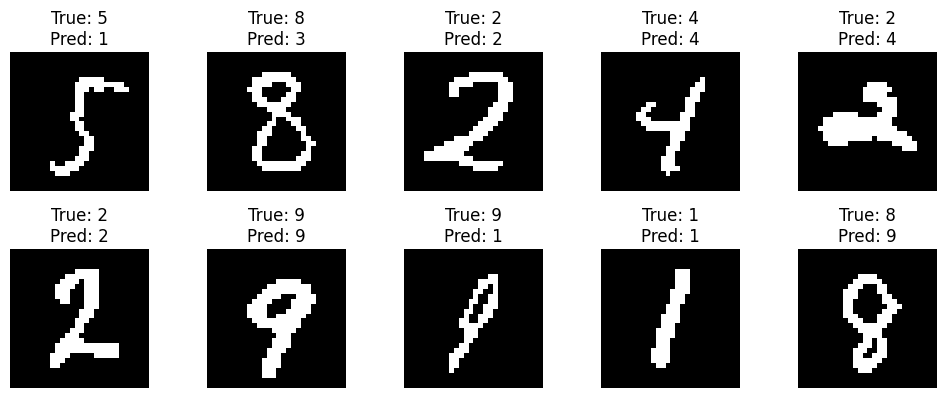

In [4]:
import struct
import gzip
import matplotlib.pyplot as plt
import numpy as np  # 用于从缓冲区读取数据
import mindspore.context as context
import mindspore.numpy as mnp
import mindspore.ops as ops
from mindspore import Tensor

# 设置MindSpore的运行环境
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

def read_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和图片数量
        magic, num_images = struct.unpack(">II", f.read(8))
        # 读取图片的行数和列数
        num_rows, num_cols = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of images: {num_images}, Rows: {num_rows}, Columns: {num_cols}")
        # 读取图片数据
        buffer = f.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return Tensor(images, dtype=mnp.float32)

def read_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和标签数量
        magic, num_labels = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of labels: {num_labels}")
        # 读取标签数据
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return Tensor(labels, dtype=mnp.int32)

# 设置数据集文件路径
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# 读取数据集
X_train = read_images(train_images_path)
y_train = read_labels(train_labels_path)
X_test = read_images(test_images_path)
y_test = read_labels(test_labels_path)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# 将数据转换为mindspore.numpy数组
X_train = mnp.array(X_train) / 255.0
X_test = mnp.array(X_test) / 255.0
y_train = mnp.array(y_train)
y_test = mnp.array(y_test)

# 将图像二值化
X_train = (X_train > 0.5).astype(mnp.float32)
X_test = (X_test > 0.5).astype(mnp.float32)

# 将图像展开成一维向量
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = {}
        self.feature_probs = {}

    def fit(self, X, y):
        self.classes = mnp.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes:
            indices = mnp.where(y == cls, mnp.ones_like(y), mnp.zeros_like(y)).astype(bool)
            X_cls = X[indices]
            self.class_priors[int(cls.asnumpy())] = X_cls.shape[0] / n_samples
            self.feature_probs[int(cls.asnumpy())] = (X_cls.sum(axis=0) + 1) / (X_cls.shape[0] + 2)

    def predict(self, X):
        posteriors = []
        for x in X:
            posterior_probs = {}
            for cls in self.classes:
                cls_int = int(cls.asnumpy())
                prior = mnp.log(Tensor(self.class_priors[cls_int], dtype=mnp.float32))
                conditional = mnp.sum(mnp.log(Tensor(self.feature_probs[cls_int], dtype=mnp.float32)) * x + mnp.log(1 - Tensor(self.feature_probs[cls_int], dtype=mnp.float32)) * (1 - x))
                posterior_probs[cls_int] = prior + conditional
            posteriors.append(max(posterior_probs, key=posterior_probs.get))
        return mnp.array(posteriors)

# 实例化朴素贝叶斯分类器
nb = NaiveBayes()

# 对数据进行训练
nb.fit(X_train, y_train)

# 对测试数据进行预测
y_pred = nb.predict(X_test)
accuracy = mnp.mean((y_pred == y_test).astype(mnp.float32))
print(f"Accuracy: {accuracy.asnumpy():.4f}")

# 可视化部分预测结果
import random

# 随机选择10个测试样本
indices = random.sample(range(X_test.shape[0]), 10)
images = X_test[indices].reshape(-1, 28, 28)
true_labels = y_test[indices]
pred_labels = y_pred[indices]

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].asnumpy(), cmap='gray')
    plt.title(f"True: {true_labels[i].asnumpy()}\nPred: {pred_labels[i].asnumpy()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
import struct
import gzip
import matplotlib.pyplot as plt
import mindspore.context as context
import mindspore.numpy as mnp
from mindspore import Tensor

# 设置MindSpore的运行环境
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

def read_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和图片数量
        magic, num_images = struct.unpack(">II", f.read(8))
        # 读取图片的行数和列数
        num_rows, num_cols = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of images: {num_images}, Rows: {num_rows}, Columns: {num_cols}")
        # 读取图片数据
        buffer = f.read()
        images = mnp.frombuffer(buffer, dtype=mnp.uint8).reshape(num_images, num_rows, num_cols)
        return Tensor(images, dtype=mnp.float32)

def read_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和标签数量
        magic, num_labels = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of labels: {num_labels}")
        # 读取标签数据
        buffer = f.read()
        labels = mnp.frombuffer(buffer, dtype=mnp.uint8)
        return Tensor(labels, dtype=mnp.int32)

# 设置数据集文件路径
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# 读取数据集
X_train = read_images(train_images_path)
y_train = read_labels(train_labels_path)
X_test = read_images(test_images_path)
y_test = read_labels(test_labels_path)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# 将数据转换为mindspore.numpy数组
X_train = mnp.array(X_train) / 255.0
X_test = mnp.array(X_test) / 255.0
y_train = mnp.array(y_train)
y_test = mnp.array(y_test)

# 将图像二值化
X_train = (X_train > 0.5).astype(mnp.float32)
X_test = (X_test > 0.5).astype(mnp.float32)

# 将图像展开成一维向量
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = {}
        self.feature_probs = {}

    def fit(self, X, y):
        self.classes = mnp.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes:
            indices = mnp.where(y == cls, mnp.ones_like(y), mnp.zeros_like(y)).astype(bool)
            X_cls = X[indices]
            self.class_priors[int(cls.asnumpy())] = X_cls.shape[0] / n_samples
            self.feature_probs[int(cls.asnumpy())] = (X_cls.sum(axis=0) + 1) / (X_cls.shape[0] + 2)

    def predict(self, X):
        posteriors = []
        for x in X:
            posterior_probs = {}
            for cls in self.classes:
                cls_int = int(cls.asnumpy())
                prior = mnp.log(Tensor(self.class_priors[cls_int], dtype=mnp.float32))
                conditional = mnp.sum(mnp.log(Tensor(self.feature_probs[cls_int], dtype=mnp.float32)) * x + mnp.log(1 - Tensor(self.feature_probs[cls_int], dtype=mnp.float32)) * (1 - x))
                posterior_probs[cls_int] = prior + conditional
            posteriors.append(max(posterior_probs, key=posterior_probs.get))
        return mnp.array(posteriors)

# 实例化朴素贝叶斯分类器
nb = NaiveBayes()

# 对数据进行训练
nb.fit(X_train, y_train)

# 对测试数据进行预测
y_pred = nb.predict(X_test)
accuracy = mnp.mean((y_pred == y_test).astype(mnp.float32))
print(f"Accuracy: {accuracy.asnumpy():.4f}")

# 可视化部分预测结果
import random

# 随机选择10个测试样本
indices = random.sample(range(X_test.shape[0]), 10)
images = X_test[indices].reshape(-1, 28, 28)
true_labels = y_test[indices]
pred_labels = y_pred[indices]

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].asnumpy(), cmap='gray')
    plt.title(f"True: {true_labels[i].asnumpy()}\nPred: {pred_labels[i].asnumpy()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28


AttributeError: module 'mindspore.numpy' has no attribute 'frombuffer'